In [6]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
def normal(X):    
    return (X-X.mean(axis=0))/X.std()    

In [8]:
df = pd.read_csv("C:/Users/PAPAM/Desktop/FODS/3D_spatial_network.txt",sep=",",header=None)
t=df.iloc[:,3]
t.head()
t=np.c_[t]
X=df.iloc[:,1:3]
X.head()
X=np.c_[X]
X=normal(X)
t=normal(t)
# X= np.c_[np.ones((len(X), 1)), X]


In [37]:
class polyreg:
    def __init__(self,x,st,regf,eta=0.01,n=500,sr=1e-10):
        self.n=n
        self.eta=eta
        self.sr= sr
        self.newx = np.empty(shape=[x.shape[0],0])
        self.st=st
        self.regf=regf
    def polycoeff(self,deg=1):
        self.pow =[] 
        for i in range(deg+1):
            for j in range(i+1):
                self.pow.append([i-j,j])
        print(self.pow)                    
    def buildpoly(self,x,y):
#         self.newx = np.empty(shape=[x.shape[0],0])
        m = x.shape[0]
        for j in range(len(self.pow)):
            temp = []
            for i in range(m):
                x1 = (x[i][0])**(self.pow[j][0])
                x2 = (x[i][1])**(self.pow[j][1])
                temp.append([x1*x2])
            matx=np.array(temp)
            matx=np.c_[matx]
            self.newx = np.append(self.newx,matx,axis=1)
            self.newx=np.c_[self.newx]
        print(self.newx.shape)
    def polyfit(self,x,y):
        m = x.shape[0]
        self.cost_ = []
        self.rmse_ = []
        self.r2_ = []
        self.w_ = np.random.randn(len(self.pow), 1)
        for i in range(self.n):
            y_pred = np.dot(self.newx,self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(self.newx.T, residuals)
            k=0
            if(self.st=="l2"):
                k=(self.eta / m) * gradient_vector+(self.regf*self.w_*(self.eta))
            else:
                k=(self.eta / m) * gradient_vector+(self.regf*np.sign(self.w_)*(self.eta))
            if np.linalg.norm(k)<self.sr:
                break
            self.w_ -= k
            cost=0
            if(self.st=="l2"):
                cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf/2)*np.sum(np.dot(self.w_,self.w_.T))     
            else:
                cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf)*np.sum(abs(self.w_))
#             self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)            
            self.cost_.append(cost)
            self.rmse_.append((cost*2)**(0.5))
            ssr = np.sum((residuals)**2)
            sst = np.sum((y - np.mean(y))**2)
            self.r2_.append(1 - (ssr/sst))
    def predict(self,x):
        m = x.shape[0]
        predx = np.empty(shape=[x.shape[0],0])
        for j in range(len(self.pow)):
            temp = []
            for i in range(m):
                x1 = (x[i][0])**(A.pow[j][0])
                x2 = (x[i][1])**(A.pow[j][1])
                temp.append([x1*x2])
            matx=np.array(temp)
            matx=np.c_[matx]
            predx = np.append(predx,matx,axis=1)
            predx=np.c_[predx]
        y_pred = np.dot(predx,self.w_)
        return y_pred

In [38]:
A =polyreg(X,"l1",0.1,0.01,1000) 

In [39]:
A.polycoeff(6)

[[0, 0], [1, 0], [0, 1], [2, 0], [1, 1], [0, 2], [3, 0], [2, 1], [1, 2], [0, 3], [4, 0], [3, 1], [2, 2], [1, 3], [0, 4], [5, 0], [4, 1], [3, 2], [2, 3], [1, 4], [0, 5], [6, 0], [5, 1], [4, 2], [3, 3], [2, 4], [1, 5], [0, 6]]


In [40]:
A.buildpoly(X,t)

(434874, 1)
(434874, 2)
(434874, 3)
(434874, 4)
(434874, 5)
(434874, 6)
(434874, 7)
(434874, 8)
(434874, 9)
(434874, 10)
(434874, 11)
(434874, 12)
(434874, 13)
(434874, 14)
(434874, 15)
(434874, 16)
(434874, 17)
(434874, 18)
(434874, 19)
(434874, 20)
(434874, 21)
(434874, 22)
(434874, 23)
(434874, 24)
(434874, 25)
(434874, 26)
(434874, 27)
(434874, 28)


In [41]:
A.polyfit(X,t)

In [42]:
A.w_

array([[ 8.16877456e-04],
       [-3.67457318e-04],
       [ 9.87655056e-01],
       [-3.58834568e-01],
       [-5.80428950e-04],
       [-3.51278623e-04],
       [ 7.54481442e-04],
       [-6.08643984e-04],
       [-9.76764576e-04],
       [ 1.48157770e-01],
       [ 5.09701078e-04],
       [ 1.31996747e-05],
       [-9.57704656e-04],
       [ 7.24233560e-04],
       [ 1.63615847e+00],
       [ 4.19789581e-04],
       [-6.73785244e-05],
       [-5.84507962e-04],
       [ 1.23627806e-04],
       [ 6.86103205e-04],
       [ 1.33226859e-04],
       [ 2.09886650e-01],
       [-3.47713975e-01],
       [ 9.28173321e-04],
       [ 6.32866181e-04],
       [-1.30193267e-04],
       [-3.90335854e-04],
       [ 3.92958183e-04]])

In [43]:
A.cost_[-1]

0.5012807765117326

In [44]:
A.rmse_[-1]

1.001279957366303

In [45]:
A.r2_[-1]

-0.0025615530234646133

In [46]:
y_pred=A.predict(X)

In [47]:
y_pred

array([[-0.01357163],
       [-0.01357969],
       [-0.01358511],
       ...,
       [ 0.01811817],
       [ 0.0179755 ],
       [ 0.01799015]])

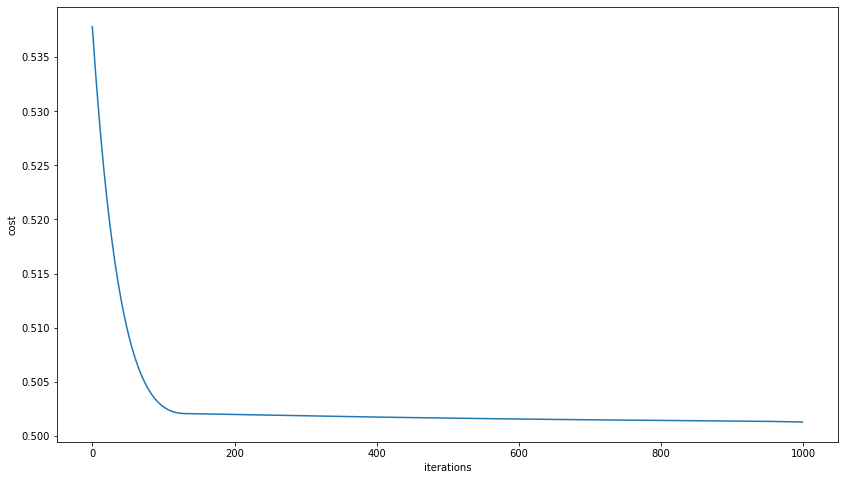

In [52]:
plt.figure(figsize=(14,8))
plt.plot(range(len(A.cost_)),A.cost_)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [53]:
B =polyreg(X,"l2",0.1,0.01,1000)

In [54]:
B.polycoeff(6)

[[0, 0], [1, 0], [0, 1], [2, 0], [1, 1], [0, 2], [3, 0], [2, 1], [1, 2], [0, 3], [4, 0], [3, 1], [2, 2], [1, 3], [0, 4], [5, 0], [4, 1], [3, 2], [2, 3], [1, 4], [0, 5], [6, 0], [5, 1], [4, 2], [3, 3], [2, 4], [1, 5], [0, 6]]


In [55]:
B.buildpoly(X,t)

(434874, 1)
(434874, 2)
(434874, 3)
(434874, 4)
(434874, 5)
(434874, 6)
(434874, 7)
(434874, 8)
(434874, 9)
(434874, 10)
(434874, 11)
(434874, 12)
(434874, 13)
(434874, 14)
(434874, 15)
(434874, 16)
(434874, 17)
(434874, 18)
(434874, 19)
(434874, 20)
(434874, 21)
(434874, 22)
(434874, 23)
(434874, 24)
(434874, 25)
(434874, 26)
(434874, 27)
(434874, 28)


In [57]:
B.polyfit(X,t)

In [58]:
B.w_

array([[-1.74028116e-04],
       [-6.54948640e-02],
       [ 2.29864233e-01],
       [ 1.75712084e-01],
       [ 2.30979060e-01],
       [-8.92777099e-02],
       [-4.04536577e-01],
       [ 5.15100676e-03],
       [ 1.52953203e-01],
       [-4.07776124e-01],
       [-2.89030521e-01],
       [-5.70186403e-01],
       [-2.86439457e-01],
       [ 2.81310081e-01],
       [-2.11716133e-01],
       [-4.52909731e-01],
       [ 1.23702806e-01],
       [-1.71640944e-01],
       [ 2.08801125e-01],
       [-5.69750805e-01],
       [ 3.06026177e-01],
       [ 3.02590591e-01],
       [ 6.93066633e-01],
       [-6.26595963e-02],
       [-3.15318697e-01],
       [ 3.23967485e-01],
       [ 3.15024685e-01],
       [ 2.55012227e-01]])

In [60]:
B.cost_[-1]

0.5004141508079885

In [61]:
B.rmse_[-1]

1.000414065083042

In [62]:
B.r2_[-1]

-0.0008283016159762457

In [63]:
y_pred2=B.predict(X)

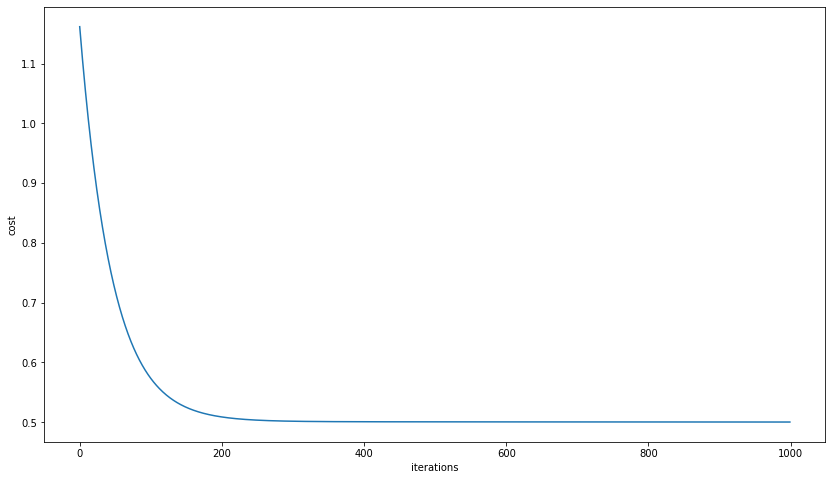

In [64]:
plt.figure(figsize=(14,8))
plt.plot(range(len(B.cost_)),B.cost_)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()